In [2]:
!readlink -f TiC-init-data.ipynb

/ihome/kjohnson/ska31/AdversarialAttack-DP/reactive_active_learning/TiC-init-data.ipynb


In [1]:
from catkit.gen.surface import SlabGenerator
from ase.build import bulk
from ase.visualize import view
from ase import Atom
from ase.io import read, write
import numpy as np
import matplotlib.pyplot as plt
from deepmd.infer import DeepPot
import os
# from mp_api.client import MPRester
# api_key='VJu07llihiS1dRqq8MPm1OT4p86jWOlc'
from catkit.build import molecule
from catkit.gen.adsorption import Builder
import dpdata
import json
from sklearn.metrics import mean_squared_error
import itertools
import random

/ihome/kjohnson/ska31/.local/lib/python3.9/site-packages/catkit/gen/utils/connectivity.py:4: UserWarning: A NumPy version >=1.22.4 and <1.29.0 is required for this version of SciPy (detected version 1.22.0)
  import scipy
2024-10-05 17:20:03.022685: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term


### Create npy files for integer magnetization configurations

In [2]:
def create_npy(filename,sys,label,sample_conf):
    r_outcar = dpdata.LabeledSystem(f'{sys}/OUTCAR',fmt='vasp/outcar')
    g_npy = r_outcar.sub_system(sample_conf).to('deepmd/npy',f'{filename}/init.data/data.{str(label).zfill(2)}/deepmd_data')

In [ ]:
# finding out an extensive list of MD data


In [13]:
count = 0
vasp_md_paths = ['/ihome/kjohnson/cyv3/TiCy/TiC/PBE/md2500K',
        '/ihome/kjohnson/cyv3/TiCy/TiC/PBE/md1000K',
        '/ihome/kjohnson/cyv3/TiCy/Ti2C/md2500K',
        '/ihome/kjohnson/cyv3/TiCy/Ti2C/md1000K',
        '/ix/kjohnson/karlj/TiCy/bulk/Ti8C5']

working_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk'
for x in vasp_md_paths:
    tot_len = int(os.popen(f'grep T= {x}/report.out | wc -l').read().split()[0])
    create_npy(working_path,x,count,np.arange(0,tot_len,80))
    count+=1 

In [14]:
deepmd_data_path = f'{working_path}/init.data'
deepmd_path_list = [f'{deepmd_data_path}/{x}/deepmd_data' for x in sorted(os.listdir(working_path+'/init.data'))]
np.savetxt(f'{deepmd_data_path}/deepmd_data_path.dat',deepmd_path_list,fmt='%s') 

In [9]:
# 4281/80
x = '/ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/100'
tot_len = int(os.popen(f'grep T= {x}/report.out | wc -l').read().split()[0])


4283

In [8]:
count=0
vasp_md_paths=['init.',
'/ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/100',
'/ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/110',
'/ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/111',
'/ix/kjohnson/karlj/TiCy/TiCySurface/Ti2C/md/111', #
'/ix/kjohnson/cyv3/TiCySurface/Ti2C/md/100',
'/ix/kjohnson/cyv3/TiCySurface/Ti2C/md/110',
'/ix/kjohnson/cyv3/TiCySurface/Ti2C/md/111', #
'/ix/kjohnson/cyv3/TiCySurface/TiC/md/100',
'/ix/kjohnson/cyv3/TiCySurface/TiC/md/110',
'/ix/kjohnson/cyv3/TiCySurface/TiC/md/111']

working_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface'
for x in vasp_md_paths:
    tot_len = int(os.popen(f'grep T= {x}/report.out | wc -l').read().split()[0])
    print(f'{tot_len}: {x}')
    if '100WithMix' in x:
        split = 40
    if 'Ti2C' and '111' in x:
        split = 20
    else:
        split = 80
    create_npy(working_path,x,count,np.arange(0,tot_len,split))
    count+=1 

deepmd_data_path = f'{working_path}/init.data'
deepmd_path_list = [f'{deepmd_data_path}/{x}/deepmd_data' for x in sorted(os.listdir(working_path+'/init.data'))]
np.savetxt(f'{deepmd_data_path}/deepmd_data_path.dat',deepmd_path_list,fmt='%s') 

10000: /ix/kjohnson/karlj/TiCy/TiCySurface/Ti2C/md/100WithMix
5461: /ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/100
10000: /ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/110
10000: /ix/kjohnson/karlj/TiCy/TiCySurface/Ti8C5/111
1625: /ix/kjohnson/karlj/TiCy/TiCySurface/Ti2C/md/111
3476: /ix/kjohnson/cyv3/TiCySurface/Ti2C/md/100
3392: /ix/kjohnson/cyv3/TiCySurface/Ti2C/md/110
1193: /ix/kjohnson/cyv3/TiCySurface/Ti2C/md/111
20000: /ix/kjohnson/cyv3/TiCySurface/TiC/md/100
20000: /ix/kjohnson/cyv3/TiCySurface/TiC/md/110
20000: /ix/kjohnson/cyv3/TiCySurface/TiC/md/111


In [3]:
# tot_len

In [ ]:
# x='/ix/kjohnson/karlj/MethaneCoupling/MD/vasp_gam/'
# tot_len = int(os.popen(f'grep T= {x}/report.out | wc -l').read().split()[0])
# out_list = []
# for i in range(tot_len):
#     try: 
#         outcar = read(f'{x}/OUTCAR',index=i)
#         out_list += [outcar]
#     except:
#         print(f'{i}: error')

In [19]:
outcar

Atoms(symbols='C30H120', pbc=True, cell=[10.0, 10.0, 10.0], calculator=SinglePointDFTCalculator(...))

In [5]:
# ch4 molecule
count = 0
vasp_md_paths = ['/ix/kjohnson/karlj/MethaneCoupling/MD']
working_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/molecule'
for x in vasp_md_paths:
    tot_len = int(os.popen(f'grep T= {x}/report.out | wc -l').read().split()[0])
    create_npy(working_path,x,count,np.arange(0,tot_len,150))
    count+=1 

In [6]:
deepmd_data_path = f'{working_path}/init.data'
deepmd_path_list = [f'{deepmd_data_path}/{x}/deepmd_data' for x in sorted(os.listdir(working_path+'/init.data'))]
np.savetxt(f'{deepmd_data_path}/deepmd_data_path.dat',deepmd_path_list,fmt='%s') 

In [5]:
# checking issue with data
import os
import json
from random import randint, randrange
import numpy as np
path='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-4/train/dp0/input.json'
with open(path, 'r+') as f:
    data = json.load(f)
    app_sys =  data["training"]["training_data"]["systems"]
for a in app_sys:
    energy = np.load(f'{a}/set.000/energy.npy')
    force = np.load(f'{a}/set.000/energy.npy')
    box = np.load(f'{a}/set.000/box.npy')
    coord = np.load(f'{a}/set.000/coord.npy')
    type_map = np.loadtxt(f'{a}/type_map.raw',dtype=str)
    type_file = np.loadtxt(f'{a}/type.raw',dtype=str)
    print(energy.shape, coord.shape, type_map.shape, type_file.shape, a)
#     break

(250,) (250, 24) (2,) (8,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.00/deepmd_data
(250,) (250, 24) (2,) (8,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.01/deepmd_data
(250,) (250, 144) (2,) (48,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.02/deepmd_data
(250,) (250, 144) (2,) (48,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.03/deepmd_data
(125,) (125, 117) (2,) (39,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.04/deepmd_data
(125,) (125, 504) (3,) (168,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.00/deepmd_data
(69,) (69, 351) (2,) (117,) /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.01/deepmd_data
(125,) (125, 351) (2,) (117,) /bgfs/kjohnson/ska31/6A

### Parity plot for training data

In [3]:
# loading models
## loading all gen 0 DPs
dp_paths= [] # only init
dp_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-2/train'
for i in range(4):
    dp_paths += [DeepPot(f'{dp_path}/dp{i}/graph.pb')]

2024-08-31 11:56:42.139831: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-31 11:56:42.143831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/rh/httpd24/root/usr/lib64:/opt/rh/rh-nodejs10/root/usr/lib64:/opt/rh/httpd24/root/usr/lib64
2024-08-31 11:56:42.143869: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-31 11:56:42.143900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterhub.crc.pitt.edu): /proc/driver/n

In [5]:
# path='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/gen-0/train/dp0/input.json'
path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-2/train/dp0/input.json'
with open(path, 'r+') as f:
    data = json.load(f)
    app_sys =  data["training"]["training_data"]["systems"]

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.00/deepmd_data
RMSE:
0.007363319422292178
0.007874569708364048
0.006151873235757144
0.008713808889565057


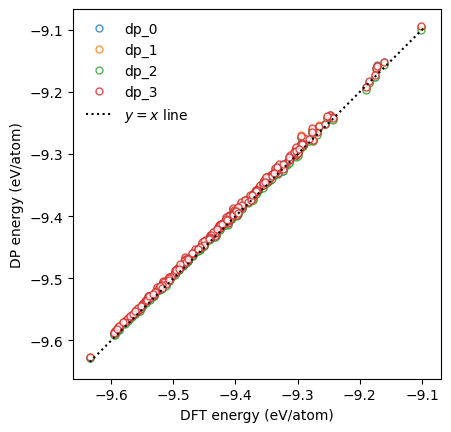

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.01/deepmd_data
RMSE:
0.006732655602565457
0.007678454697070435
0.006137683875703191
0.008194217360557055


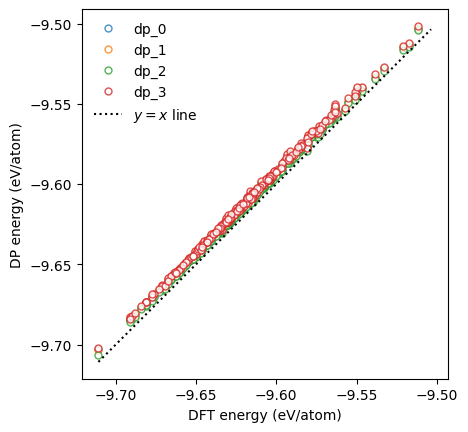

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.02/deepmd_data
RMSE:
0.0026057389150684653
0.0025387217790922042
0.002583979131671849
0.002570902786162588


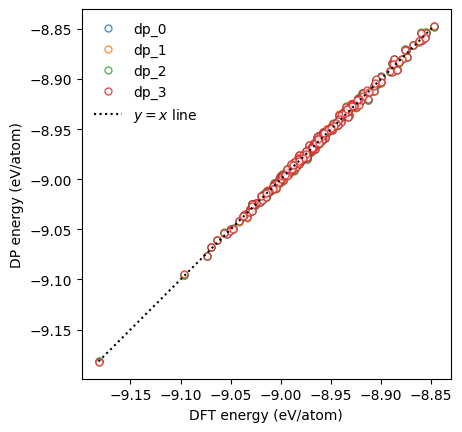

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.03/deepmd_data
RMSE:
0.000982670683016522
0.0009124011155963653
0.0010395558894228845
0.000948040687586874


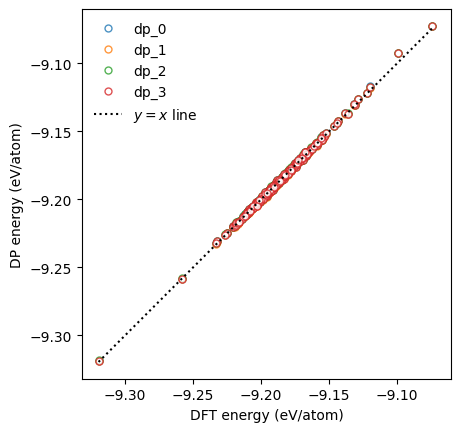

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/init.data/data.04/deepmd_data
RMSE:
1.1848965987374114
1.162007909848082
1.1398417525302307
1.2402079555941055


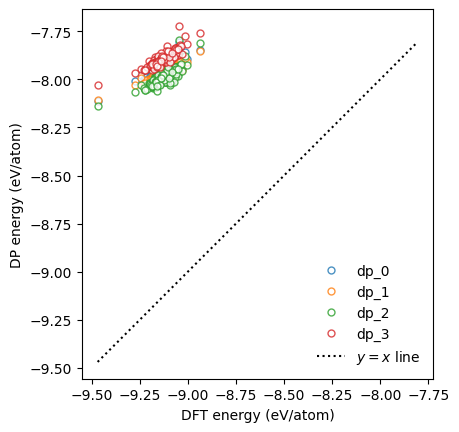

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.00/deepmd_data
RMSE:
2.5147924393394585
1.5938747220601075
2.383672189483742
2.4964838496511055


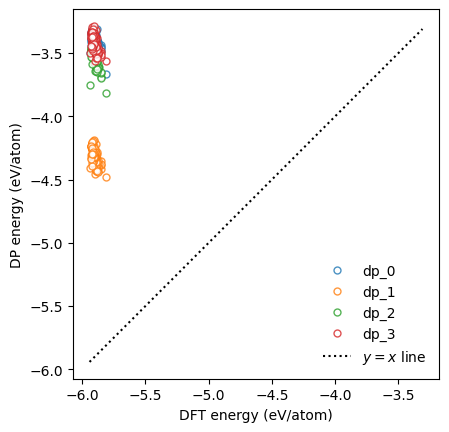

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.01/deepmd_data
RMSE:
1.2564633250537678
1.2174587136450319
1.250026470533015
1.2525797093140656


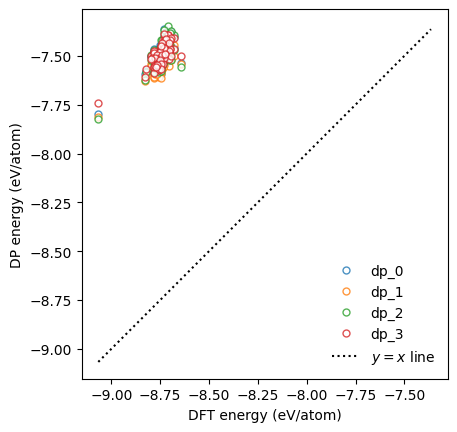

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.02/deepmd_data
RMSE:
1.1880953753145884
1.172130449487186
1.2099857505223603
1.2002460264603851


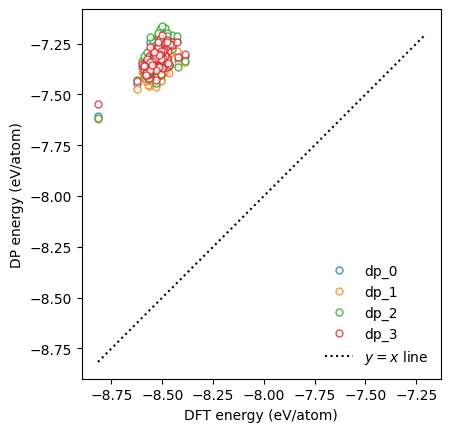

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.03/deepmd_data
RMSE:
1.1364869600637382
1.1125279724348942
1.1695381547040737
1.153022487106932


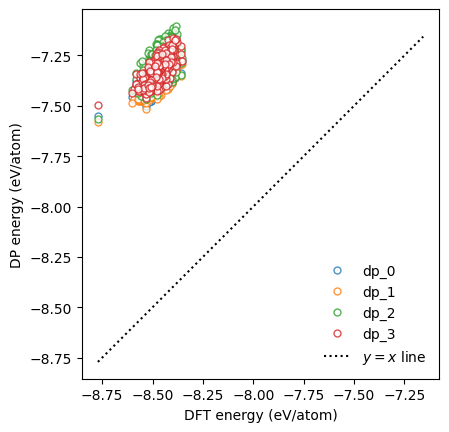

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.04/deepmd_data
RMSE:
1.6439370193845901
1.8063428871291376
1.7108300039236521
1.7501403554196395


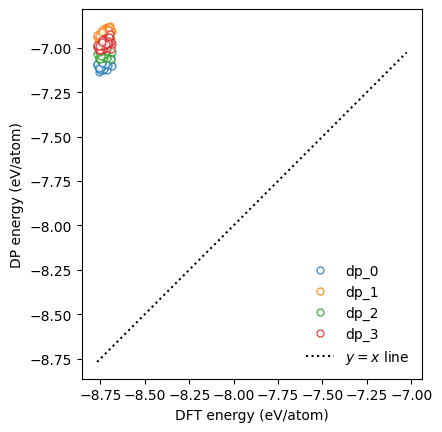

/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/init.data/data.05/deepmd_data
RMSE:



KeyboardInterrupt



In [6]:
dft_f = []
dp_f = []
box_list = []
coord_list = []
dft_e = []
dp_e = []
for i, a in enumerate(app_sys):
    print(a)
    print('RMSE:')
    path = f'{a}/set.000'
    a_type = np.loadtxt(f'{a}/type.raw')
    x_i = np.load(f'{path}/coord.npy')
    force_i = np.load(f'{path}/force.npy')
    tot_atms = force_i.shape[1]//3
    dft_ei = np.load(f'{path}/energy.npy')/tot_atms
    box_i = np.load(f'{path}/box.npy')
    dp_e = [[dp_paths[j].eval(x_i, box_i, a_type)[0]/tot_atms for j in range(4)]]
    linear = np.linspace(np.min([dp_e[0][0].T[0], dft_ei]), np.max([dp_e[0][0].T[0], dft_ei]))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    for j, dpei in enumerate(dp_e[0]):
        plt.plot(dft_ei, dpei, 'o', label=f'dp_{j}', alpha=0.80, mfc='white',markersize = 5)
        print(np.sqrt(mean_squared_error(dft_ei, dpei.T[0])))
    plt.plot(linear, linear, 'k:', label = r'$y=x$ line')
    plt.ylabel('DP energy (eV/atom)')
    plt.xlabel('DFT energy (eV/atom)')
    plt.legend(frameon=False)
    plt.show()
    
    

In [19]:
# funtion to get these plots
def plot_parity(a, dp_paths,order={'Ti':0,'C':1,'H':2}):
#     print(path)
    print('RMSE:')
    path = f'{a}/set.000'
    # use type map to get integer mapping - make that a new dict and then rewrite atype
    a_map = np.loadtxt(f'{a}/type_map.raw', dtype=str)
    mapping_type = {i:order[symb] for i,symb in enumerate(a_map)}
    a_type_raw = np.loadtxt(f'{a}/type.raw')
    a_type = np.array([mapping_type[x] for x in a_type_raw])
    print(a_type)
    x_i = np.load(f'{path}/coord.npy')
    force_i = np.load(f'{path}/force.npy')
    tot_atms = force_i.shape[1]//3
    dft_ei = np.load(f'{path}/energy.npy')/tot_atms
    box_i = np.load(f'{path}/box.npy')
    dp_e = [[dp_paths[j].eval(x_i, box_i, a_type)[0]/tot_atms for j in range(4)]]
    linear = np.linspace(np.min([dp_e[0][0].T[0], dft_ei]), np.max([dp_e[0][0].T[0], dft_ei]))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    for j, dpei in enumerate(dp_e[0]):
        plt.plot(dft_ei, dpei, 'o', label=f'dp_{j}', alpha=0.80, mfc='white',markersize = 5)
        print(np.sqrt(mean_squared_error(dft_ei, dpei.T[0])))
    plt.plot(linear, linear, 'k:', label = r'$y=x$ line')
    plt.ylabel('DP energy (eV/atom)')
    plt.xlabel('DFT energy (eV/atom)')
    plt.legend(frameon=False)
    plt.show()

In [10]:
dp_paths_0 = []
dp_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-0/train'
for i in range(4):
    dp_paths_0 += [DeepPot(f'{dp_path}/dp{i}/graph.pb')]

RMSE:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
0.05407453401727248
0.06378415633335258
0.12922846501672325
0.064703196689121


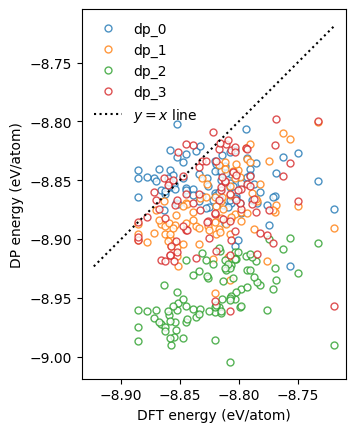

In [20]:
plot_parity('/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-1/relabel.neb/00/deepmd_data', dp_paths_0)

### Generating structures

In [3]:
def maintain_order_poscar(inp, desired_order):
    atm = read(inp)
    # np.unique(atm.get_chemical_symbols())
    tot_atms_list = [len([x for x in atm.get_chemical_symbols() if x == do]) for do in desired_order] # [96, 48]
    desired_chemf = ''.join([str(x) + str(y) for x, y in zip(desired_order, tot_atms_list)]) # desired chem formula
    og_pos = atm.get_positions()
    if desired_chemf != atm.get_chemical_formula():
    #     print('pain')
        atm_2 = atm.copy()
        new_symb = list(itertools.chain.from_iterable(itertools.repeat(x, y) for x,y in ziJustp(desired_order, tot_atms_list)))
        atm_2.set_chemical_symbols(new_symb)
        new_pos = np.vstack([np.array([x for x, y in zip(atm.get_positions(),atm.get_chemical_symbols())  if y == do]) for do in desired_order])
        atm_2.set_positions(new_pos)
    #     print(atm_2)
        write(f'{inp}',atm_2)
        

In [4]:
def poscar2lmp(inp, out):
    data = dpdata.System(inp, fmt = 'vasp/poscar')
    data.to('lammps/lmp', out, frame_idx=0)

In [18]:
from ase.build import surface

In [19]:
bulk_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk'
TiC=read(f"{bulk_path}/structures/TiC.poscar") # 8 atoms
Ti2C=read(f"{bulk_path}/structures/Ti2C.poscar") # 48 atoms
Ti8C5=read(f"{bulk_path}/structures/Ti8C5.poscar") # 39 atoms


In [7]:
# poscar2lmp(f'{surface_path}/structures/TiC/surf_{str_m}.poscar', 
#               f'{surface_path}/structures/TiC/surf_{str_m}.lmp')

In [20]:
surface_path ='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/'
miller_indices = [(1, 0, 0),(0, 1, 0),(0, 0, 1),(1, 1, 0),(1, 1, 1)]
tic_surf = []
for i, m in enumerate(miller_indices):
    print(m)
    str_m = ''.join([str(x) for x in m])
    temp_surf = surface(TiC, m, 4, vacuum=7.5)
    temp_surf = temp_surf.repeat([2,2,1])
    print(len(temp_surf))
    write(f'{surface_path}/structures/TiC/surf_{str_m}.poscar',temp_surf, direct=True, vasp5=True, sort=True)
    maintain_order_poscar(f'{surface_path}/structures/TiC/surf_{str_m}.poscar', ['Ti','C']) # maintains the order of elements. Important for DP. 
    poscar2lmp(f'{surface_path}/structures/TiC/surf_{str_m}.poscar', 
              f'{surface_path}/structures/TiC/surf_{str_m}.lmp')
    tic_surf += [temp_surf]
    

(1, 0, 0)
128
(0, 1, 0)
128
(0, 0, 1)
128
(1, 1, 0)
128
(1, 1, 1)
128


In [21]:
surface_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/'
miller_indices = [(1, 0, 0),(0, 1, 0),(0, 0, 1),(1, 1, 0),(1, 1, 1)]
tic_surf = []
for i, m in enumerate(miller_indices):
    print(m)
    str_m = ''.join([str(x) for x in m])
    temp_surf = surface(Ti2C, m, 3, vacuum=7.5)
#     temp_surf = temp_surf.repeat([2,2,1])
    print(len(temp_surf))
    write(f'{surface_path}/structures/Ti2C/surf_{str_m}.poscar',temp_surf, direct=True, vasp5=True, sort=True)
    maintain_order_poscar(f'{surface_path}/structures/Ti2C/surf_{str_m}.poscar', ['Ti','C'])
    poscar2lmp(f'{surface_path}/structures/Ti2C/surf_{str_m}.poscar', 
              f'{surface_path}/structures/Ti2C/surf_{str_m}.lmp')
    tic_surf += [temp_surf]
    

(1, 0, 0)
144
(0, 1, 0)
144
(0, 0, 1)
144
(1, 1, 0)
144
(1, 1, 1)
144


In [22]:
surface_path ='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/'
miller_indices = [(1, 0, 0),(0, 1, 0),(0, 0, 1),(1, 1, 0),(1, 1, 1)]
tic_surf = []
for i, m in enumerate(miller_indices):
    print(m)
    str_m = ''.join([str(x) for x in m])
    temp_surf = surface(Ti8C5, m, 3, vacuum=7.5)
#     temp_surf = temp_surf.repeat([2,2,1])
    print(len(temp_surf))
    write(f'{surface_path}/structures/Ti8C5/surf_{str_m}.poscar',temp_surf, direct=True, vasp5=True, sort=True)
    maintain_order_poscar(f'{surface_path}/structures/Ti8C5/surf_{str_m}.poscar', ['Ti','C'])
    poscar2lmp(f'{surface_path}/structures/Ti8C5/surf_{str_m}.poscar', 
              f'{surface_path}/structures/Ti8C5/surf_{str_m}.lmp')
    tic_surf += [temp_surf]
    

(1, 0, 0)
117
(0, 1, 0)
117
(0, 0, 1)
117
(1, 1, 0)
117
(1, 1, 1)
117


In [23]:
# generating large structures for TiC and Ti2C
TiC_r = TiC.repeat([3,3,2])
write(f'{bulk_path}/structures/TiC_332.poscar',TiC_r, direct=True, vasp5=True, sort=True)
maintain_order_poscar(f'{bulk_path}/structures/TiC_332.poscar', ['Ti','C'])
poscar2lmp(f'{bulk_path}/structures/TiC_332.poscar', 
          f'{bulk_path}/structures/TiC_332.lmp')

In [24]:
Ti2C_r = Ti2C.repeat([2,2,1])
write(f'{bulk_path}/structures/Ti2C_221.poscar',Ti2C_r, direct=True, vasp5=True, sort=True)
maintain_order_poscar(f'{bulk_path}/structures/Ti2C_221.poscar', ['Ti','C'])
poscar2lmp(f'{bulk_path}/structures/Ti2C_221.poscar', 
          f'{bulk_path}/structures/Ti2C_221.lmp')

In [25]:
poscar2lmp(f'{bulk_path}/structures/Ti8C5.poscar', 
          f'{bulk_path}/structures/Ti8C5.lmp')

In [28]:
# converting gas + surface 
surface_path ='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface'
maintain_order_poscar(f'{surface_path}/structures/mix-Ti2C/wrap-mix-Ti2C.poscar', ['Ti','C','H'])
poscar2lmp(f'{surface_path}/structures/mix-Ti2C/wrap-mix-Ti2C.poscar', 
          f'{surface_path}/structures/mix-Ti2C/mix-Ti2C.lmp')

### Setting up DPMD AL for TiC bulk 

In [ ]:
# len(lmp_files)

In [5]:
# Here make sure that lmp_files = the path of the your lmp file(s) that will be used for DPMD
# lmp_files = ['/ih']

# gets all the lmp files generated 
surface_path ='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface'
bulk_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk'
get_lmp_path = lambda ref_path: sorted([f'{ref_path}/{x}' for x in os.listdir(ref_path) if 'lmp' in x])
struct_paths = [f'{surface_path}/structures/TiC',
               f'{surface_path}/structures/Ti2C',
               f'{surface_path}/structures/Ti8C5',
               f'{surface_path}/structures/mix-Ti2C',
               f'{bulk_path}/structures']

lmp_files = []
for x in struct_paths:
    lmp_files += get_lmp_path(x)
    
lmp_files

['/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_001.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_010.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_100.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_110.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_111.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_001.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_010.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_100.lmp',
 '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_110.lmp

In [22]:
# need a sample lammps script to run MD with model devi using all these structures.
# Variables to change are:
# variable        NSTEPS          equal 1000000
# variable        THERMO_FREQ     equal 100
# variable        DUMP_FREQ       equal 100
# variable        TEMP            equal 300.000000
# variable        PRES            equal -1.000000
# variable        TAU_T           equal 0.100000
# variable        TAU_P           equal 0.500000

# TODO::
# write a script to change the lammps input files
# write a script to randomly initialize the velcocities

In [1]:
# a=['Ti','C','H']
# if 'Ti' and 'C' in a and len(a)==2:
#     print('Ji')

In [24]:
md_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-2/md'
ref_lammps = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/sample-lammps'
lmp_12 = f'{ref_lammps}/in-12.lammps' # TiC 
lmp_123 = f'{ref_lammps}/in-123.lammps' # TiCH

for i, lm in enumerate(lmp_files):
    print(lm)
    md_i = f'{md_path}/md.{str(i).zfill(2)}'
    vsp = lm.split('lmp')[0]+'poscar'
    os.system(f'ln -s {vsp} {md_i}/conf.poscar')
    print(vsp)
    elems = os.popen(f'sed -n 6p {md_i}/conf.poscar').read().split()
#     print(elems)
    if 'Ti' and 'C' in elems and len(elems)==2:
        print()
        lmp_inp_file = lmp_12
    elif 'Ti' and 'C' and 'H' in elems and len(elems)==3:
        lmp_inp_file = lmp_123
        
#     os.system(f'echo {lm} > {md_i}/lmp_path.txt')
    if f'md.{str(i).zfill(2)}' not in os.listdir(md_path):
        os.mkdir(f'{md_path}/md.{str(i).zfill(2)}')
    md_i = f'{md_path}/md.{str(i).zfill(2)}'
    os.system(f'cp {lmp_inp_file} {md_i}/in.lammps')
    os.system(f'cp {ref_lammps}/job.slurm {md_i}/')
    os.system(f'cp {lm} {md_i}/conf.lmp')
    if 'traj' not in os.listdir(md_i):
        os.mkdir(f'{md_i}/traj')



/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_001.lmp


ln: failed to create symbolic link ‘/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-2/md/md.00/conf.poscar’: No such file or directory


/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_001.poscar


sed: can't read /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-2/md/md.00/conf.poscar: No such file or directory


NameError: name 'lmp_inp_file' is not defined

In [7]:
# creating symbolic links in md dir
# use this inside md: ln -s ../train/dp2/graph.pb graph.002.pb
md_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-1/md'
# use this 
dp_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-1/train'
for i in range(4):
    os.system(f'ln -s {dp_path}/dp{i}/graph.pb {md_path}/graph.{str(i).zfill(3)}.pb')


## Filter and relabel here

In [3]:
# Here make sure that lmp_files = the path of the your lmp file(s) that will be used for DPMD
# lmp_files = ['/ih']

# gets all the lmp files generated 
surface_path ='/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface'
bulk_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk'
get_lmp_path = lambda ref_path: sorted([f'{ref_path}/{x}' for x in os.listdir(ref_path) if 'lmp' in x])
struct_paths = [f'{surface_path}/structures/TiC',
               f'{surface_path}/structures/Ti2C',
               f'{surface_path}/structures/Ti8C5',
               f'{surface_path}/structures/mix-Ti2C',
               f'{bulk_path}/structures']

lmp_files = []
for x in struct_paths:
    lmp_files += get_lmp_path(x)

md.00 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_001.lmp
md.01 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_010.lmp
md.02 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_100.lmp
md.03 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_110.lmp
md.04 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/TiC/surf_111.lmp
md.05 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_001.lmp
md.06 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_010.lmp
md.07 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/surface/structures/Ti2C/surf_100.lmp
md.08 = /bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-couplin

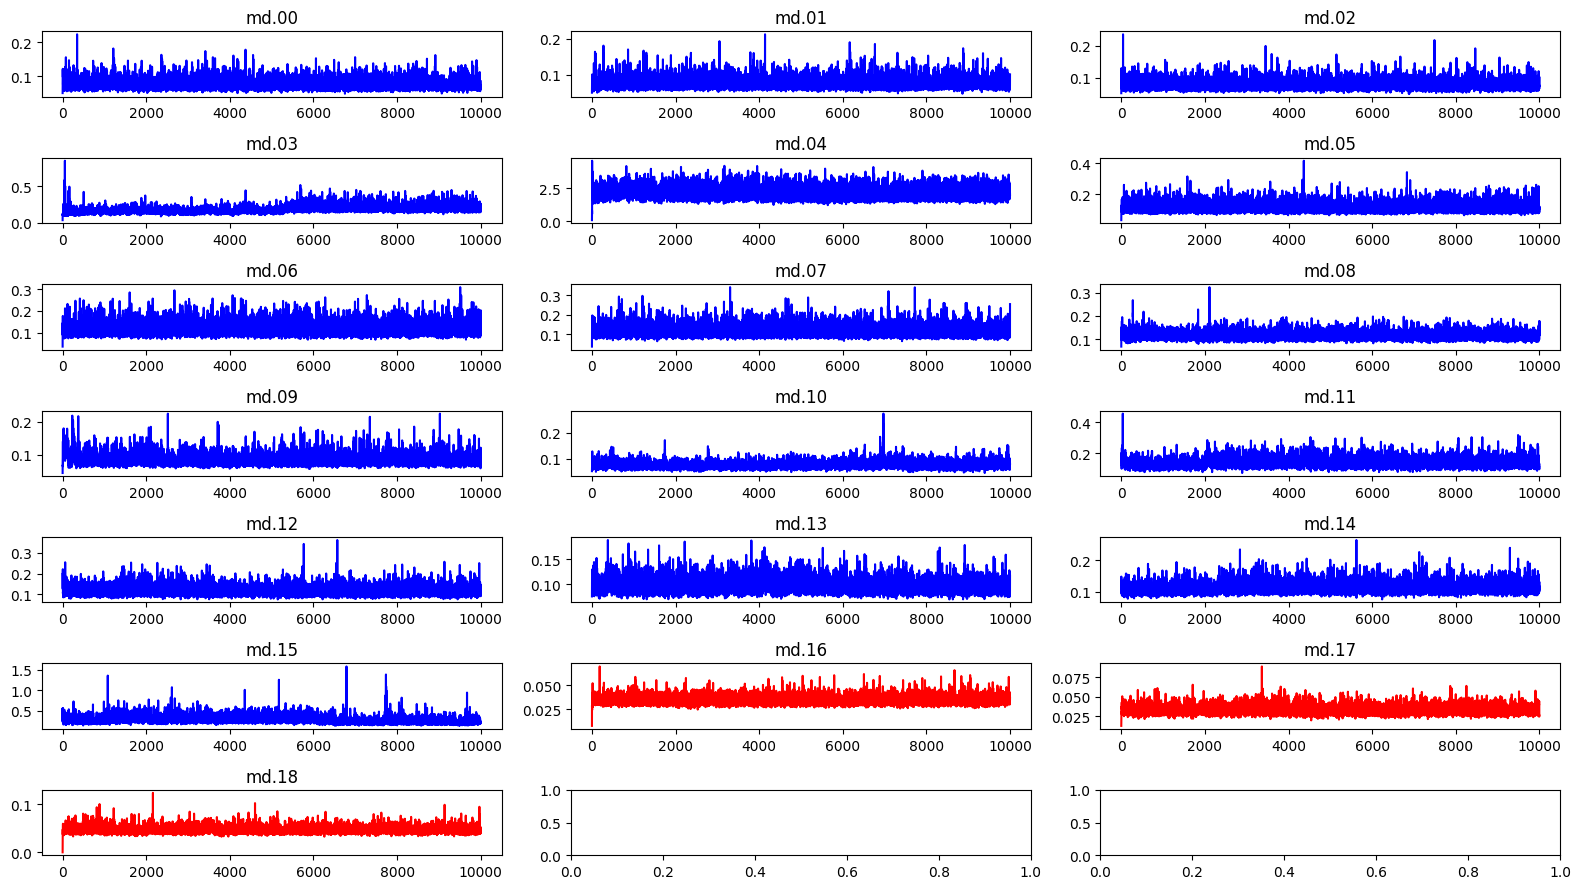

In [4]:
# plot the model deviation for energy and forces for each of these simulations

# use this 
md_path_main = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-3/md/'

def plot_get_model_dev(md_path_main):
    md_paths = sorted([x for x in os.listdir(md_path_main) if 'md' in x and os.path.isdir(f'{md_path_main}/{x}')])
    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # fig.suptitle('Horizontally stacked subplots')
    fig, axs = plt.subplots(7, 3, figsize=(16,9)) # 18 plots
    model_dev_list = []
    # plt.figure(figsize=(20,15))
    for i, md in enumerate(md_paths):
        a = np.loadtxt(f'{md_path_main}/{md}/model_devi.out')
        model_dev_list += [a]
        if 'bulk' in lmp_files[i]: # comment this out
            color = 'r'
        else:
            color = 'b' # comment this out
        axs[i//3, i%3].plot(a[:,-3],color)
        axs[i//3, i%3].set_title(md)
        print(f'{md} = {lmp_files[i]}')
    fig.tight_layout()
    return model_dev_list, md_paths
#     return sorted(random.sample(filtered, sample_fp if len(filtered) > sample_fp else len(filtered))), total_images, good, rejected

model_dev_list, md_paths = plot_get_model_dev(md_path_main) # use this to see what the best threshold can be

In [6]:
# just to convert lammpstrj files to the correct ASE atoms objects

# don't use this 
# trj = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/bulk/gen-0/999900.lammpstrj'
# elems = 'Ti C'
# elems = elems.split()
# atoms = read(trj)
# sym_index = atoms.get_atomic_numbers()
# sym_dict = {i+1:sym for i, sym in enumerate(elems)} # {'Ti':1, "C":2}
# new_chem_symb = [sym_dict[s] for s in sym_index]
# atoms.set_chemical_symbols(new_chem_symb)

In [4]:
md_paths

['md.00',
 'md.01',
 'md.02',
 'md.03',
 'md.04',
 'md.05',
 'md.06',
 'md.07',
 'md.08',
 'md.09',
 'md.10',
 'md.11',
 'md.12',
 'md.13',
 'md.14',
 'md.15',
 'md.16',
 'md.17',
 'md.18']

In [5]:
# Setting up relabeling process for all sampled structures
upthresh = 1
lowthresh = 0.1
# model_dev_i = model_dev_list[10]
image_freq = 100
sample_fp = 50

def filtering_md(model_dev_list, md_paths, upthresh, lowthresh, image_freq = 100, sample_fp = 50): # change 
    # image freq is your md output freq
    # sample_fp: number of images that you will be sampling for your single point VASP calculations
    

    filtered = []
    total_images = []
    good = []
    rejected = []
    for j, mdev in enumerate(model_dev_list):
#         print(mdev)
        total_images += [len(mdev[:,4])]
        md_pi = f'{md_path_main}/{md_paths[j]}/traj'
        good += [f'{md_pi}/{i*image_freq}.lammpstrj' for i,m in enumerate(mdev[:,4]) if m <= lowthresh]
        filtered+=[f'{md_pi}/{i*image_freq}.lammpstrj' for i,m in enumerate(mdev[:,4]) if m > lowthresh and m <= upthresh]
        rejected+=[f'{md_pi}/{i*image_freq}.lammpstrj' for i,m in enumerate(mdev[:,4]) if m > upthresh]
        plt.plot(mdev[:,4],'.',alpha=0.5,label=f'rxn_{j}')
    plt.title(f'Filtered = {len(filtered)}/{sum(total_images)}')
    plt.hlines(upthresh, -10,1e4,'red',alpha=1,linestyles='--')
    plt.hlines(lowthresh, -10,1e4,'red',alpha=1,linestyles='--')
#     plt.legend(frameon=False)
    plt.xlabel('image no.')
    plt.ylabel('max force dev.')
    return sorted(random.sample(filtered, sample_fp if len(filtered) > sample_fp else len(filtered))), total_images, good, rejected


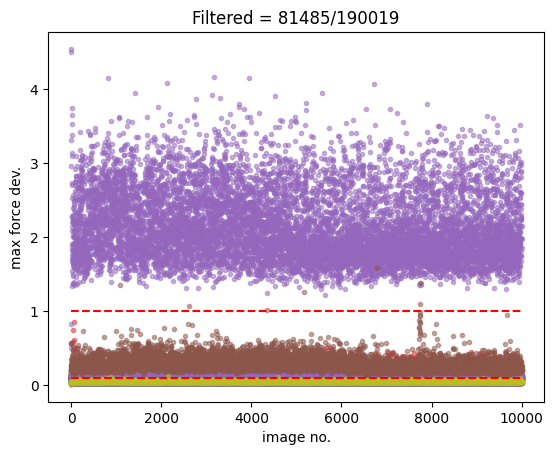

In [6]:
# len(filtered), sum(total_images)
filt, tot, _, _ = filtering_md(model_dev_list, md_paths, 1, 0.1, sample_fp = 1000) # edit this

### Relabeling selected structures

In [7]:
def create_potcar(pos, qm_method, fp_path):
#     poscar = sys.argv[1]
#     qm_method = sys.argv[2] #eg. potpaw_PBE
    potpath=lambda q,x:f'/ihome/crc/install/intel-2017.1.132/intel-mpi-2017.1.132/vasp/potcars/{q}/{x}/POTCAR'
#     pos=read(poscar)
    sym=pos.get_chemical_symbols()
    sym_un=list(dict.fromkeys(sym))
    for s in sym_un:
        os.system(f'cat {potpath(qm_method,s)} >> {fp_path}/POTCAR')

In [8]:
relabel_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-3/relabel.md'
md_main_path = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/gen-3/md'
sample_vasp = '/bgfs/kjohnson/ska31/6AA/reactive_active_learning/TiC-methane-coupling/sample-vasp'
# have to sort them out based on the md number
md_filt = [x.split('/')[-3] for x in filt]
for i, md_f in enumerate(filt):
    if md_filt[i] not in os.listdir(relabel_path):
        os.mkdir(f'{relabel_path}/{md_filt[i]}') 
    fp_md = f'{relabel_path}/{md_filt[i]}'
    image_number = int(md_f.split('/')[-1].split('.lammpstrj')[0])
    image_number_zfill = f'image.{str(image_number).zfill(7)}'
    fp_md_image = f'{relabel_path}/{md_filt[i]}/{image_number_zfill}'
    if image_number_zfill not in os.listdir(fp_md):
        os.mkdir(fp_md_image)
    atoms = read(md_f)
    vasp_atms = read(f'{md_main_path}/{md_filt[i]}/conf.poscar')
    new_chem_symb = vasp_atms.get_chemical_symbols()
#     sym_index = atoms.get_atomic_numbers()
#     sym_dict = {i+1:sym for i, sym in enumerate(elems)} # {'Ti':1, "C":2}
#     new_chem_symb = [sym_dict[s] for s in sym_index]
    atoms.set_chemical_symbols(new_chem_symb)
    write(f'{fp_md_image}/POSCAR', atoms)
    create_potcar(atoms, 'potpaw_PBE', fp_md_image)
    os.system(f'cp {sample_vasp}/INCAR.sp {fp_md_image}/INCAR') # get incar from here: /bgfs/kjohnson/ska31/6AA/reactive_active_learning/ANH/init.data.ispin/data.00/image.0000/INCAR
    os.system(f'cp {sample_vasp}/job.slurm {fp_md_image}/job.slurm')

In [9]:
def relabeling(relabel_path, md_main_path, sample_vasp_path, 
               filt): # filt come from the previous function. 
    md_filt = [x.split('/')[-3] for x in filt]
    for i, md_f in enumerate(filt):
        if md_filt[i] not in os.listdir(relabel_path):
            os.mkdir(f'{relabel_path}/{md_filt[i]}') 
        fp_md = f'{relabel_path}/{md_filt[i]}'
        image_number = int(md_f.split('/')[-1].split('.lammpstrj')[0])
        image_number_zfill = f'image.{str(image_number).zfill(7)}'
        fp_md_image = f'{relabel_path}/{md_filt[i]}/{image_number_zfill}'
        if image_number_zfill not in os.listdir(fp_md):
            os.mkdir(fp_md_image)
        atoms = read(md_f)
        vasp_atms = read(f'{md_main_path}/{md_filt[i]}/conf.poscar')
        new_chem_symb = vasp_atms.get_chemical_symbols()
    #     sym_index = atoms.get_atomic_numbers()
    #     sym_dict = {i+1:sym for i, sym in enumerate(elems)} # {'Ti':1, "C":2}
    #     new_chem_symb = [sym_dict[s] for s in sym_index]
        atoms.set_chemical_symbols(new_chem_symb)
        write(f'{fp_md_image}/POSCAR', atoms)
        create_potcar(atoms, 'potpaw_PBE', fp_md_image)
        os.system(f'cp {sample_vasp}/INCAR.sp {fp_md_image}/INCAR')
        os.system(f'cp {sample_vasp}/job.slurm {fp_md_image}/job.slurm')